# Assignment 

- With task3
- Using neural network aka deep learning 


In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [0]:
import requests
import pickle
import numpy as np 
import pandas as pd 

In [4]:

#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

In [7]:
df = pd.read_csv('test_data.csv')
df.head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
1,14,6.33,NaN,7,130.0,1.0,2,1,624,2
2,14,6.32,20.7,7,130.0,1.0,2,1,624,2
3,14,5.92,20.2,7,130.0,0.0,2,1,624,2
4,14,6.13,20.4,7,130.0,1.0,2,1,624,2


In [8]:
df.shape

(1784, 10)

# 3)- Exploring data

### 3.1)- Data type

In [9]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
dul,int64
led_type_id,int64
nutrients_id,int64
plant_id,int64
plug_density_m2,int64
substrate_id,int64
fresh_weight_plug,float64
leaf_length,float64
light_distribution_id,float64
marketable,float64


### 3.2)-Checking categorical variables

In [10]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

There is none marked as categorical varible. I was hoping "marketable" but, it is already converted to numerical values. Still we cannot assume it to be a numerical variable. As 1 is not greater than 0.

### 3.3)-Data Description

In [11]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1784.000000,1596.000000,1426.000000,1784.000000,1687.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,18.784753,6.895294,19.058282,1.512892,192.193242,0.700673,2.818386,1.994395,791.690583,9.950673
std,2.834898,1.149987,2.839304,1.756919,32.994886,0.458092,0.385634,0.815561,132.569002,4.756296
min,14.000000,5.000000,10.000000,1.000000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,16.750000,6.077500,17.000000,1.000000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,18.000000,6.580000,18.400000,1.000000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.380000,20.400000,1.000000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,13.760000,29.200000,8.000000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


It shows max and min values. There we can see mean values and we can find that some values have very high distribution considering their mean value and standard dev.

### 3.4)-Sorting

In [12]:
df.sort_values(by='leaf_length', ascending=False).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
496,20,8.30,29.2,8,170.0,0.0,3,1,624,2
223,19,10.96,28.6,7,130.0,1.0,2,2,624,2
514,20,9.62,28.5,1,170.0,0.0,3,2,624,2
502,20,8.11,28.5,8,170.0,0.0,3,1,624,2
245,19,NaN,28.4,1,230.0,1.0,2,1,624,2


In [13]:
df.sort_values(by=['leaf_length', 'plant_id'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


In [14]:
df.sort_values(by=['leaf_length','marketable'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


### 3.5)- Correlation

In [0]:
data_corrs = df.corr()

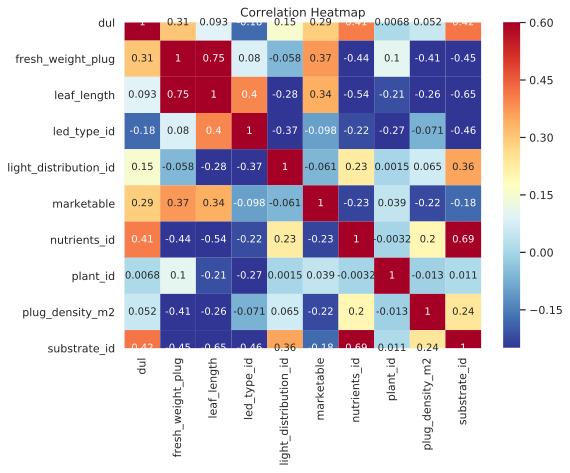

In [16]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

We will come to this when we make comparison with dependant variable

For now, we can see that fresh_weight_plug and leaf length have higher relation. Perhaps they are very close in explaining effect of each other. We can make big conclusion about it now. for now, let's keep it an assumption

### 3.6)- Missing values

In [0]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [18]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

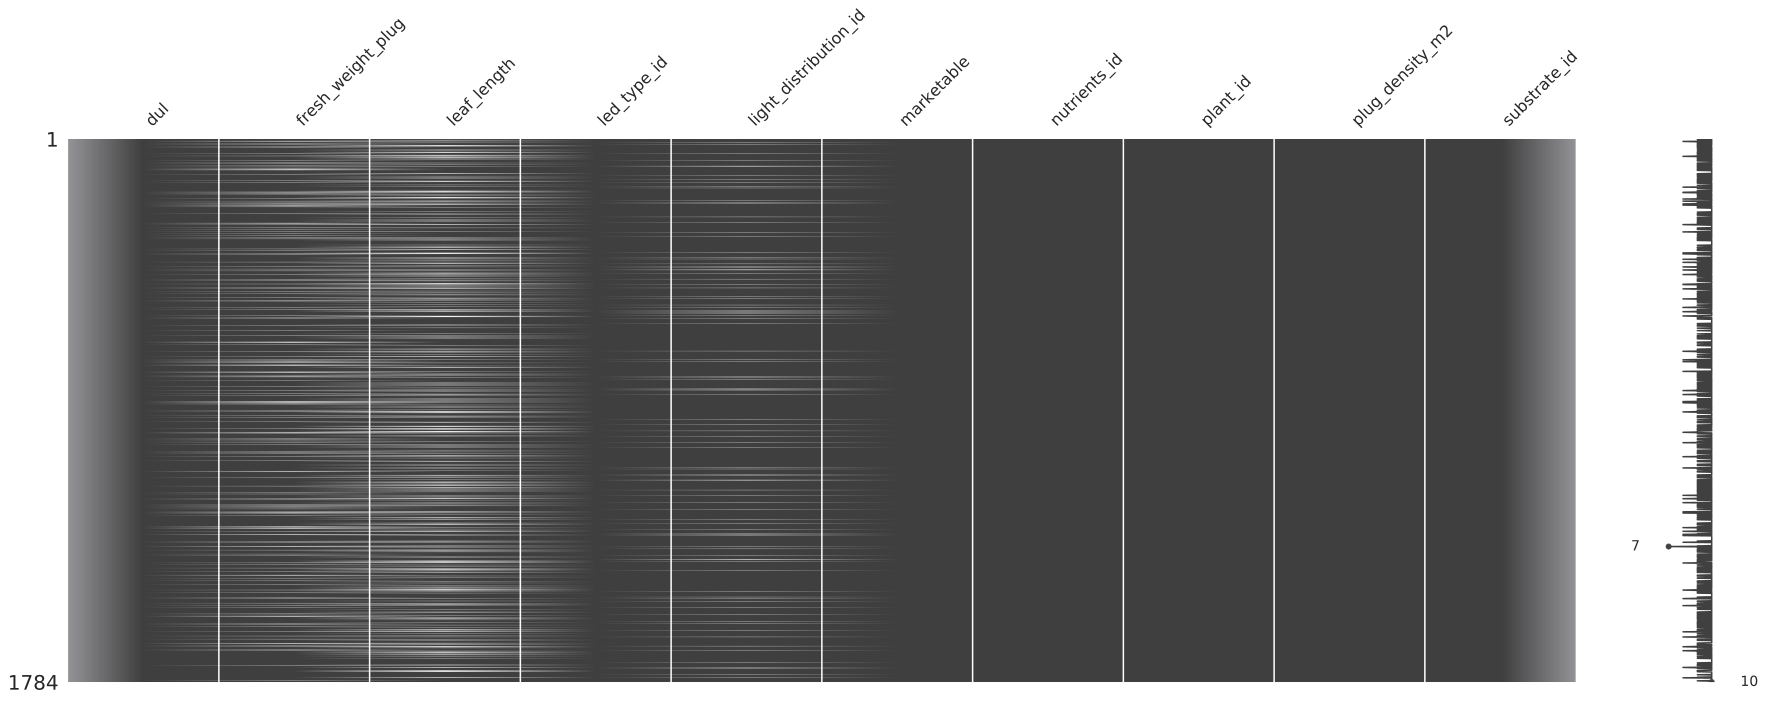

In [19]:
import missingno
missingno.matrix(df, figsize = (30,10))

We have couple of missing values there as we can see clearly. Either we remove them or we ignore them.

another option is to use imputation. We might use that.

Our dependant varibles have no missing values. So, this solution will work

### 3.6.1)- Impute missing values

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [21]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

In [22]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


We still have missing values. Perhaps they are in form of some numerical or 0 . That's why NaN cannot detect them

In [0]:
df=df.fillna(df.mean())

In [24]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### 3.7)- Duplicate values

In [25]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1779    False
1780    False
1781    False
1782    False
1783    False
Length: 1784, dtype: bool

In [26]:
df.duplicated().sum()

4

 We have four duplicate values as well. Let's see what are they

In [27]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
328,16,5.990000,19.058282,8,170.0,1.0,3,1,849,2
1017,18,6.120000,17.400000,1,170.0,1.0,3,2,849,13
1228,19,6.895294,19.058282,1,170.0,1.0,3,3,849,13
1657,24,6.895294,21.600000,1,230.0,1.0,3,2,947,13


### 3.7.1- Drop duplicate values

Only features leaf_length and fresh_weight_plug have duplicate issue

In [0]:
df.drop([1017], axis=0, inplace=True)

In [29]:
df.shape

(1783, 10)

In [30]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
328,16,5.990000,19.058282,8,170.0,1.0,3,1,849,2
1228,19,6.895294,19.058282,1,170.0,1.0,3,3,849,13
1657,24,6.895294,21.600000,1,230.0,1.0,3,2,947,13


No duplicate there

### 3.8)-Finding Outliers

In [31]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1783.000000,1783.000000,1783.000000,1783.00000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,18.785193,6.895729,19.059212,1.51318,192.205690,0.700505,2.818284,1.994391,791.658441,9.948962
std,2.835633,1.087821,2.538712,1.75737,32.089523,0.458165,0.385719,0.815790,132.599240,4.757082
min,14.000000,5.000000,10.000000,1.00000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,16.500000,6.140000,17.300000,1.00000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,18.000000,6.730000,19.058282,1.00000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.250000,19.900000,1.00000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,13.760000,29.200000,8.00000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


In [32]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('light_distribution_id', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 95.94
High value: 288.47


Solution is to normalize data . We ll do it later just before modeling

# 4)- Working with dependant variable

### For task 3 i.e marketable or not

In [33]:
df.marketable.value_counts()

1.0    1249
0.0     534
Name: marketable, dtype: int64

In [34]:
n_group = df['marketable'].value_counts()
n_group_sum = n_group.sum()

print('Marketable: {}'.format(n_group[0]))
print('Not-Marketable: {}'.format(n_group[1]))

print('percentage of Marketable: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of Not-Marketable: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

Marketable: 534
Not-Marketable: 1249
percentage of Marketable: 29.95 %
percentage of Not-Marketable: 70.05 %


There is a class imbalance as we have more not-marketable items

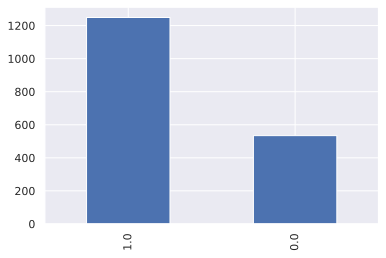

In [35]:
df['marketable'].value_counts().plot.bar()

### correlation among varibles

In [0]:
#correlations with the label feature and sort
correlations = df.corr()['marketable'].sort_values()

In [37]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 plant_id             0.039044
dul                  0.291252
leaf_length          0.308015
fresh_weight_plug    0.350634
marketable           1.000000
Name: marketable, dtype: float64


In [38]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 nutrients_id            -0.228745
plug_density_m2         -0.221229
substrate_id            -0.179008
led_type_id             -0.097548
light_distribution_id   -0.059000
Name: marketable, dtype: float64


#  5)-Task 3- predict if the product is marketable or not 

In [0]:
y=df.marketable

In [0]:
X=df.drop(['marketable'], axis=1)

In [45]:
print(y.shape)
print(X.shape)

(1783,)
(1783, 9)


In [46]:
y.value_counts()

1.0    1249
0.0     534
Name: marketable, dtype: int64

### 5.1)- Normalize data

This will solve problem of outliers as well

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [48]:
X_scaled

array([[-1.68799571e+00, -3.99834110e-04,  8.82895125e-01, ...,
        -1.21927309e+00, -1.26475444e+00, -1.67144322e+00],
       [-1.68799571e+00, -5.20203381e-01, -3.66450535e-04, ...,
        -1.21927309e+00, -1.26475444e+00, -1.67144322e+00],
       [-1.68799571e+00, -5.29398651e-01,  6.46488528e-01, ...,
        -1.21927309e+00, -1.26475444e+00, -1.67144322e+00],
       ...,
       [ 1.83954338e+00,  1.69441874e-01,  9.48731355e-02, ...,
         1.23302687e+00,  1.17184035e+00,  6.41547387e-01],
       [ 1.83954338e+00,  3.25761465e-01,  5.54720361e-02, ...,
         1.23302687e+00,  1.17184035e+00,  6.41547387e-01],
       [ 1.83954338e+00,  3.92701289e-03, -3.38538959e-01, ...,
         1.23302687e+00,  1.17184035e+00,  6.41547387e-01]])

### 5.2)- Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1426, 9)
(357, 9)
(1426,)
(357,)


### 5.3)- One-hot Encoding

In [51]:
# keras needs inputs to be vectors , so one hot encoding values
from keras.utils import np_utils
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

Using TensorFlow backend.


In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1426, 9)
(357, 9)
(1426,)
(357,)


# 6)- Model Building

Hand-made Neural network

In [0]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

In [54]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

print(metrics.recall_score(y_test,y_pred[0]))

0.6582633053221288
0.5604838709677419


We have taken accuracy and recall. These two evaluation matrices are very common in literature

Neural network seems to perform better than our traditional machine learning models. Yet we need to make more checking in this

# 6b)-Neural Network using Tensorflow

In [55]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions_tf = list(classifier.predict(X_test, as_iterable=True))
tf_score = metrics.recall_score(y_test, predictions_tf)
tf_acc = metrics.accuracy_score(y_test, predictions_tf)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contri

In [56]:
print('TF Recall Score: ', tf_score)
print('TF Accuracy Score: ', tf_acc)

TF Recall Score:  0.9032258064516129
TF Accuracy Score:  0.8403361344537815


# 6c)-Dense Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [58]:
X_train.shape[1]

9

In [59]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [62]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 20, batch_size=20, validation_data=(X_test, y_test))




Train on 1426 samples, validate on 357 samples
Epoch 1/20





1426/1426 [==============================] - 1s 578us/step - loss: 0.6953 - acc: 0.5463 - val_loss: 0.6794 - val_acc: 0.7367
Epoch 2/20
1426/1426 [==============================] - 0s 278us/step - loss: 0.6672 - acc: 0.7370 - val_loss: 0.6495 - val_acc: 0.7507
Epoch 3/20
1426/1426 [==============================] - 0s 294us/step - loss: 0.6195 - acc: 0.7819 - val_loss: 0.5655 - val_acc: 0.8263
Epoch 4/20
1426/1426 [==============================] - 0s 279us/step - loss: 0.5195 - acc: 0.8191 - val_loss: 0.4570 - val_acc: 0.8375
Epoch 5/20
1426/1426 [==============================] - 0s 287us/step - loss: 0.4628 - acc: 0.8394 - val_loss: 0.4094 - val_acc: 0.8319
Epoch 6/20
1426/1426 [==============================] - 0s 305us/step - loss: 0.4093 - acc: 0.8457 - val_loss: 0.3916 - val_acc: 0.8319
Epoch 7/20
1426/1426 [==============================] - 0s 294us/step - loss: 0.3727 - acc: 0.8569 - val_loss: 0.3737 - val_acc: 

In [0]:
y_pred_keras = model.predict(X_test)

In [64]:
y_pred_keras[:5]

array([[0.8873125 ],
       [0.8943919 ],
       [0.95202327],
       [0.78995275],
       [0.8661488 ]], dtype=float32)

In [0]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

# 7)- Model Evaluation

### i)- Accuracy Results

In [66]:
print(recall_score(y_test, yhat_class_keras))
print(accuracy_score(y_test, yhat_class_keras))

0.9314516129032258
0.8375350140056023


We have seen a mighty improvement. As I am more learned in tensorflow. so, our hand made model could not perform that well. This model is giving great results. 

**From 70% to now 93%**. This is awesome. I won't lie. Maybe I need to recheck or tune my hand made tensorflow. I will settle for winner results due to time limitation.

In [0]:
keras_score = recall_score(y_test, yhat_class_keras)
keras_acc = accuracy_score(y_test, yhat_class_keras)

### ii)- Classification Report

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, yhat_class_keras))

              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       109
         1.0       0.85      0.93      0.89       248

    accuracy                           0.84       357
   macro avg       0.82      0.78      0.79       357
weighted avg       0.83      0.84      0.83       357



### iii)- Plotting results

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

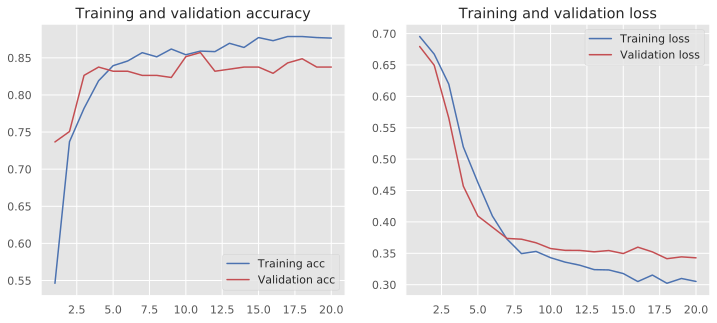

In [70]:
plot_history(history)

### iv)-Confusion Matrix

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
print(confusion_matrix(y_test, yhat_class_keras))

[[ 68  41]
 [ 17 231]]


In [73]:
cm = confusion_matrix(y_test, yhat_class_keras)
cm

array([[ 68,  41],
       [ 17, 231]])

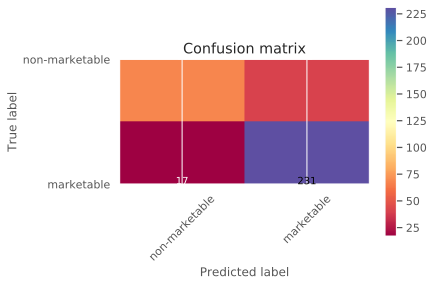

In [74]:
# False=0; True=1 ====> non-marketable=0, marketable=1
plot_confusion_matrix(cm, classes=['non-marketable', 'marketable'])

# 8)- Matrics evaluation

### a)-Null accuracy

accuracy that could be achieved by always predicting the most frequent class

In [75]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1.0    248
0.0    109
Name: marketable, dtype: int64

In [76]:
# calculate the percentage of ones
y_test.mean()

0.6946778711484594

In [77]:
# calculate the percentage of zeros
1 - y_test.mean()

0.30532212885154064

In [78]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6946778711484594

So, a rough model will have accuracy of 67%

### b)-Classification Accuracy
Overall, how often is the classifier correct?

In [79]:
print(accuracy_score(y_test, yhat_class_keras))

0.8375350140056023


In [0]:
#save confusion matrix and slice into four piece
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [81]:
print((TP + TN) / float(TP + TN + FP + FN))

0.8375350140056023


So our model has made an improvement as of null accuracy was 67%. We got a good result of 93%

### c)-Classification Error
Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate

In [82]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, yhat_class_keras))

0.16246498599439776
0.16246498599439774


### d)-Other matrices

- Sensitivity
- Specificity
- False Positive Rate
- Precision

#### Sensitivity
When the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"

In [83]:
print(recall_score(y_test, yhat_class_keras))

0.9314516129032258


In [84]:
print(TP / float(TP + FN))

0.9314516129032258


#### Specificity
When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [85]:
# No sklearn formula

print(TN / float(TN + FP))

0.6238532110091743


#### False Positive Rate
When the actual value is negative, how often is the prediction incorrect?

In [86]:
print(FP / float(TN + FP))

0.3761467889908257


#### Precision
When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [87]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, yhat_class_keras))

0.8492647058823529
0.8492647058823529
